# QRNN Training

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from typhon.retrieval.qrnn import QRNN, set_backend
set_backend("pytorch")

Using TensorFlow backend.


In [2]:
import ipywidgets as w
import matplotlib.pyplot as plt
import numpy as np

## Define network

In [3]:
quantiles = [0.01, 0.05, 0.15, 0.25, 0.35, 0.45, 0.5, 0.55, 0.65, 0.75, 0.85, 0.95, 0.99]
n_layers = 6
n_neurons = 128
log_rain_rates = False
qrnn = QRNN(28, quantiles=quantiles, model=(n_layers, n_neurons, 'relu'))

## Train

In [4]:
from torch.utils.data import DataLoader, random_split
from regn.data import GprofData
training_data = GprofData("../../data/training_data_small.nc",
                          batch_size=32,
                          log_rain_rates=log_rain_rates)
training_data.store_normalization_data("normalization_data.nc")
validation_data = GprofData("../../data/validation_data_small.nc",
                            batch_size=32,
                            normalization_data="normalization_data.nc",
                            log_rain_rates=log_rain_rates)
results = qrnn.train(training_data, validation_data, maximum_epochs=100, initial_learning_rate=1e-2, gpu=True)

Epoch 0 / 100: Training error: 0.045, Validation error: 0.046, Learning rate: 0.01000
Epoch 1 / 100: Training error: 0.044, Validation error: 0.045, Learning rate: 0.01000
Epoch 2 / 100: Training error: 0.044, Validation error: 0.045, Learning rate: 0.01000
Epoch 3 / 100: Training error: 0.044, Validation error: 0.045, Learning rate: 0.01000
Epoch 4 / 100: Training error: 0.043, Validation error: 0.045, Learning rate: 0.01000
Epoch 5 / 100: Training error: 0.043, Validation error: 0.045, Learning rate: 0.01000
Epoch 6 / 100: Training error: 0.043, Validation error: 0.045, Learning rate: 0.01000
Epoch 7 / 100: Training error: 0.043, Validation error: 0.045, Learning rate: 0.01000
Epoch 8 / 100: Training error: 0.043, Validation error: 0.045, Learning rate: 0.01000
Epoch 9 / 100: Training error: 0.043, Validation error: 0.045, Learning rate: 0.01000
Epoch 10 / 100: Training error: 0.043, Validation error: 0.045, Learning rate: 0.01000
Epoch 11 / 100: Training error: 0.043, Validation err

Epoch 94 / 100: Training error: 0.016, Validation error: 0.017, Learning rate: 0.01000
Epoch 95 / 100: Training error: 0.016, Validation error: 0.017, Learning rate: 0.01000
Epoch 96 / 100: Training error: 0.016, Validation error: 0.017, Learning rate: 0.01000
Epoch 97 / 100: Training error: 0.016, Validation error: 0.017, Learning rate: 0.01000
Epoch 98 / 100: Training error: 0.016, Validation error: 0.017, Learning rate: 0.01000
Epoch 99 / 100: Training error: 0.016, Validation error: 0.017, Learning rate: 0.01000


## Results

Text(0.5, 0, 'Epoch')

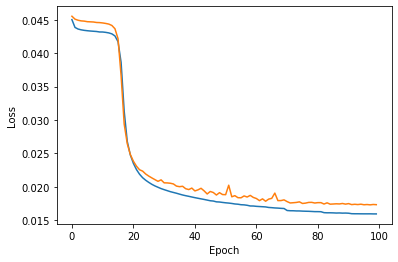

In [5]:
err_t = results["training_errors"]
err_v = results["validation_errors"]
plt.plot(err_t)
plt.plot(err_v)
plt.ylabel("Loss")
plt.xlabel("Epoch")

## Save network

In [6]:
if log_rain_rates:
    qrnn.save(f"qrnn_{n_layers}_{n_neurons}_log.pt")
else:
    qrnn.save(f"qrnn_{n_layers}_{n_neurons}.pt")

In [7]:
log_rain_rates

False

In [8]:
x, y = qrnn.calibration(validation_data)

100%|██████████| 750/750 [00:00<00:00, 1260.62it/s]


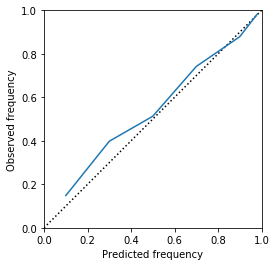

In [9]:
f, ax = plt.subplots(1, 1)
x0 = np.linspace(0, 1, 101)
ax.plot(x0, x0, c="k", ls=":")
ax.plot(x, y)
ax.set_xlabel("Predicted frequency")
ax.set_ylabel("Observed frequency")
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_aspect(1.0)